# TEMPERATURE PREDICTION PROJECT

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df = pd.read_csv('Temparature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
np.where(pd.isnull(df))[0]

array([ 225,  225,  271, ..., 7750, 7751, 7751], dtype=int64)

Here removing the nan values

In [4]:
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)

In [5]:
df.shape

(7588, 25)

Dataset contains 7588 rows and 25 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.shape

(7588, 25)

Dataset contains 7588 rows and 25 columns

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Dataset contains 25 columns

# Summary statistics

In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile 

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [11]:
df.Next_Tmax.unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5, 32.8, 33.7, 33.2, 32.9,
       34.1, 34.9, 35.3, 34.6, 35. , 33.9, 33.8, 34.4, 35.6, 35.1, 34.2,
       36. , 35.5, 35.2, 34.7, 35.4, 21.6, 23.5, 24.4, 24. , 35.9, 36.1,
       22.5, 22.8, 36.2, 35.8, 21.1, 23.3, 22. , 22.7, 20.9, 22.2, 22.1,
       37. , 36.9, 22.9, 35.7, 37.1, 22.3, 22.6, 37

Target/dependent variables is discrete and categorial in nature


In [12]:
df.Next_Tmax.value_counts()

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
38.9      1
21.4      1
20.6      1
38.7      1
18.9      1
Name: Next_Tmax, Length: 181, dtype: int64

Here Dataset Next_Tmax contains some categorical values

In [13]:
df.Next_Tmin.unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
       26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6,
       28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1, 28.5,
       28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7,
       17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3, 15.4,
       15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1, 15. ,
       11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16.1, 29

Target/dependent variables is discrete and categorial in nature


In [14]:
df.Next_Tmin.value_counts()

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
28.5      1
29.8      1
13.9      1
13.6      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

Here Dataset Next_Tmin contains some catagorical values

# Data visualizations

<AxesSubplot:xlabel='station', ylabel='count'>

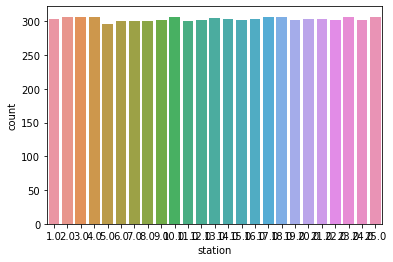

In [15]:
sns.countplot(df['station'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='Date', ylabel='count'>

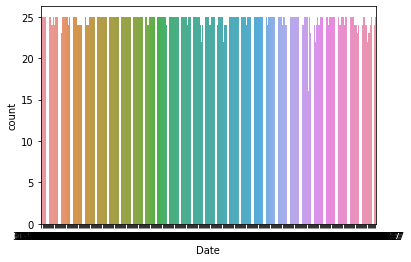

In [16]:
sns.countplot(df['Date'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='Present_Tmax', ylabel='count'>

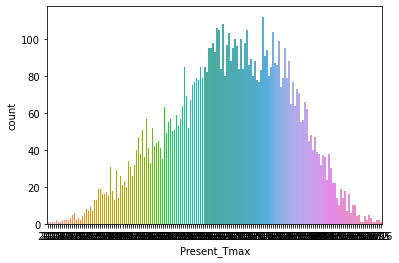

In [17]:
sns.countplot(df['Present_Tmax'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Present_Tmin', ylabel='count'>

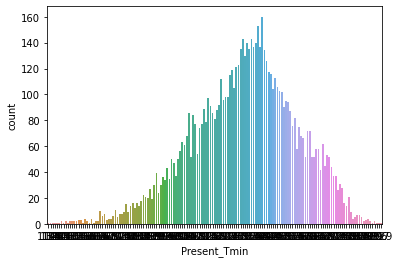

In [18]:
sns.countplot(df['Present_Tmin'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='lat', ylabel='count'>

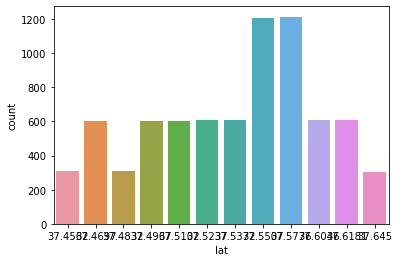

In [19]:
sns.countplot(df['lat'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='lon', ylabel='count'>

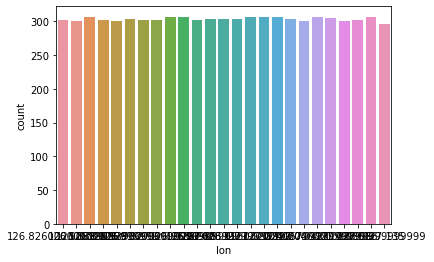

In [20]:
sns.countplot(df['lon'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='DEM', ylabel='count'>

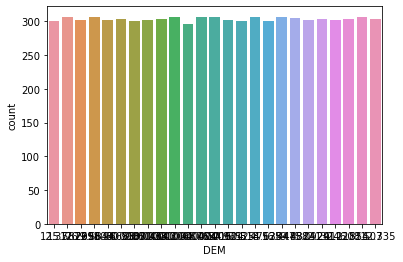

In [21]:
sns.countplot(df['DEM'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Next_Tmin', ylabel='count'>

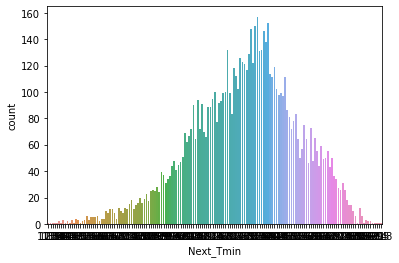

In [22]:
sns.countplot(df['Next_Tmin'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Next_Tmax', ylabel='count'>

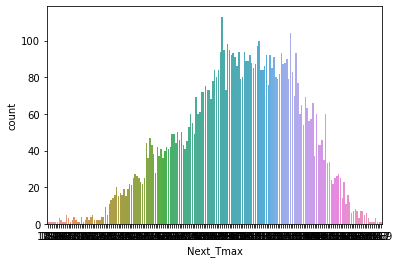

In [23]:
sns.countplot(df['Next_Tmax'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:>

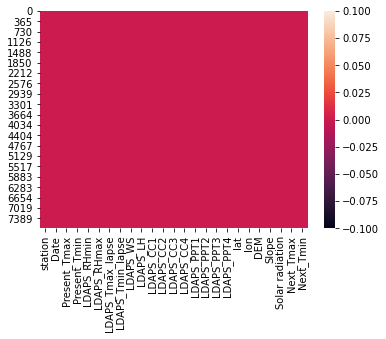

In [24]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [25]:
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

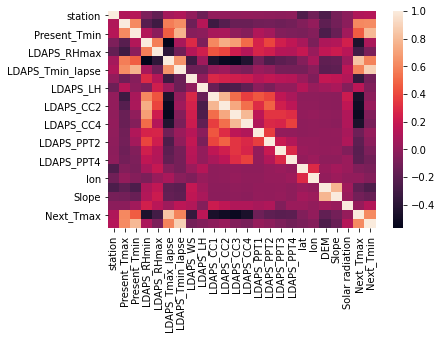

In [26]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

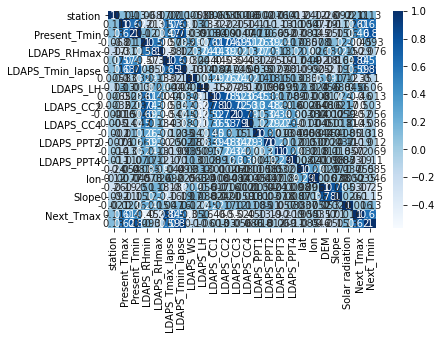

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

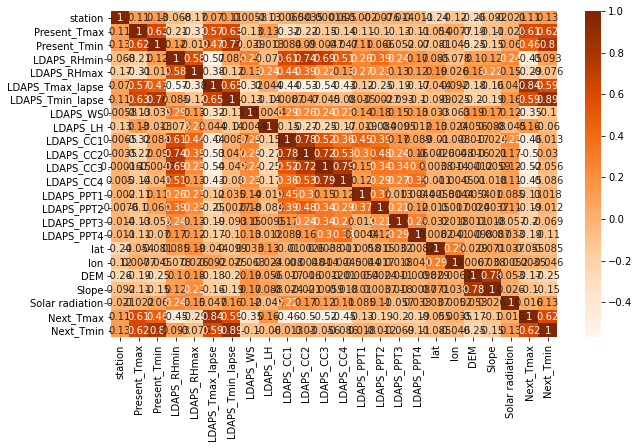

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

# Plotting outliers

In [29]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:>

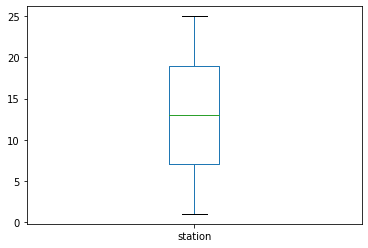

In [30]:
df['station'].plot.box()

<AxesSubplot:>

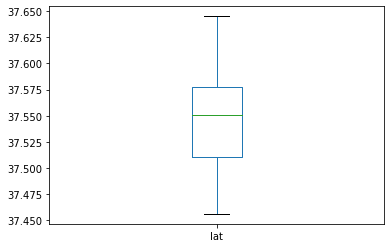

In [31]:
df['lat'].plot.box()

Here all boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

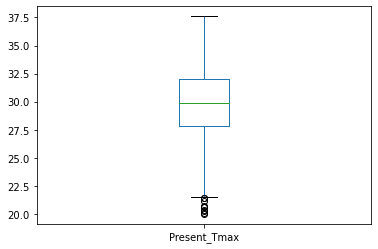

In [32]:
df['Present_Tmax'].plot.box()

Here all boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

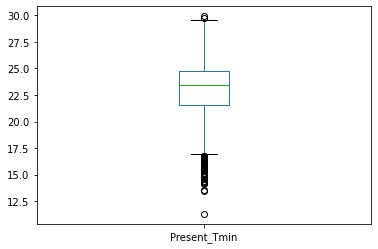

In [33]:
df['Present_Tmin'].plot.box()

Here all boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

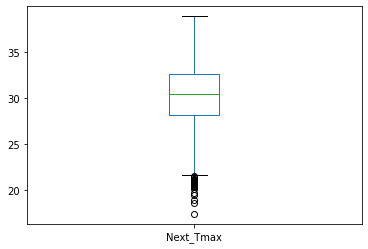

In [34]:
df['Next_Tmax'].plot.box()

Here all boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

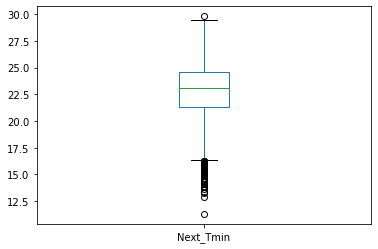

In [35]:
df['Next_Tmin'].plot.box()

Here all boxplot have outside the viscous so we can find here outliers easily.

In [36]:
df.shape

(7588, 25)

Dataset contains 7588 rows and 25 columns

# To check distribution of skewness

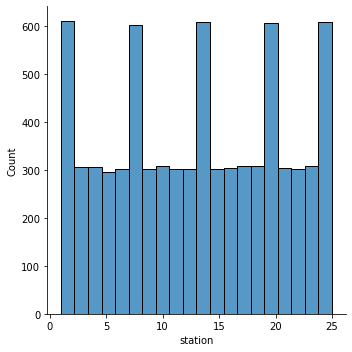

In [37]:
sns.displot(df['station'])

Data is not normally distributed in this columns.

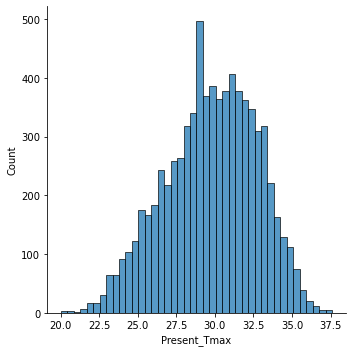

In [38]:
sns.displot(df['Present_Tmax'])

Data is not normally distributed in this columns.

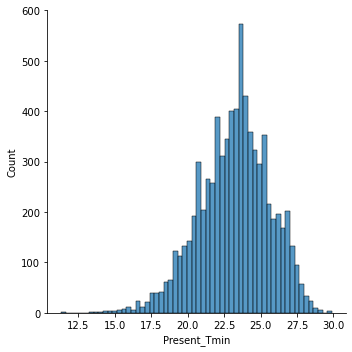

In [39]:
sns.displot(df['Present_Tmin'])

Data is not normally distributed in this columns.

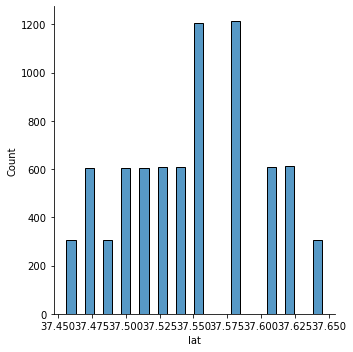

In [40]:
sns.displot(df['lat'])

Data is not normally distributed in this columns.

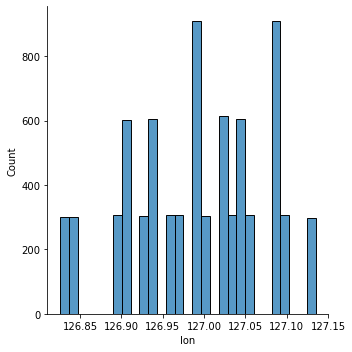

In [41]:
sns.displot(df['lon'])

Data is not normally distributed in this columns.

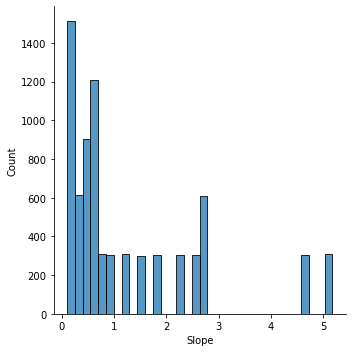

In [42]:
sns.displot(df['Slope'])

Data is not normally distributed in this columns.

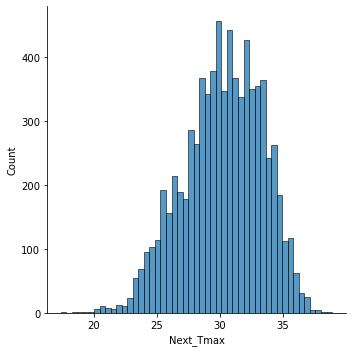

In [43]:
sns.displot(df['Next_Tmax'])

Data is not normally distributed in this columns.

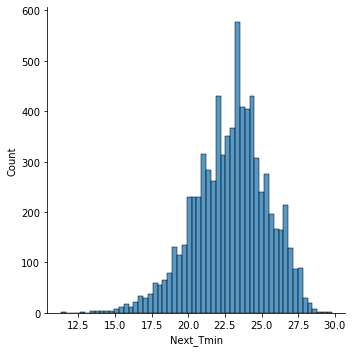

In [44]:
sns.displot(df['Next_Tmin'])

Data is not normally distributed in this columns.

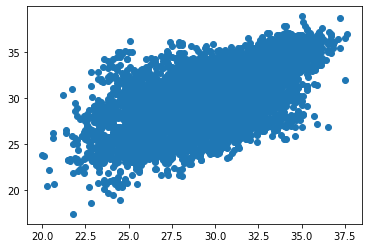

In [45]:
plt.scatter(df['Present_Tmax'],df['Next_Tmax'])

Scattering the plot of present_tmax and next_tmax

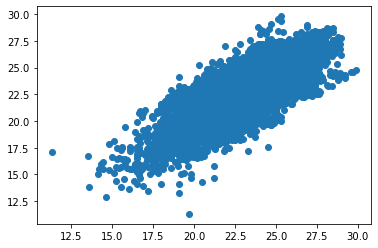

In [46]:
plt.scatter(df['Present_Tmin'],df['Next_Tmin'])
plt.show()

Here scattering of the plot present_Tmin and next_Tmin

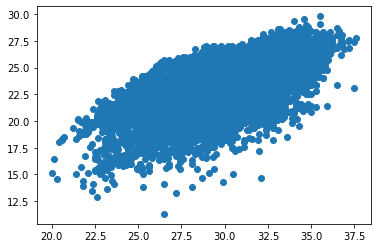

In [47]:
plt.scatter(df['Present_Tmax'],df['Next_Tmin'])

Here scattering the plot of present_tmax and next_tmin

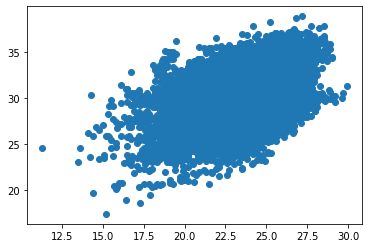

In [48]:
plt.scatter(df['Present_Tmin'],df['Next_Tmax'])
plt.show()

Here Scattering the plot present_tmin and present next_max

In [49]:
df.drop('Present_Tmax',axis=1,inplace=True)

In [50]:
df.drop('Present_Tmin',axis=1,inplace=True)

In [51]:
df.head()

,station,Date,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [52]:
df.shape

(7588, 23)

Dataset contains 7588 rows and 23 columns

In [53]:
df.columns

Index(['station', 'Date', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse',
       'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2',
       'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3',
       'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Dataset contains 23 columns

In [54]:
df.drop(['Date'],axis=1,inplace=True)

# Removing The Outliers

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66460654, 0.10466029, 0.38276804, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.3050523 , 0.31169653, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.54934444, 0.60942455, ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.05008127, 1.31837609, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.23473536, 1.5371407 , ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.310467  , 1.54425718, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

Here removing the outliers of df

In [56]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7579, 7579, 7582], dtype=int64), array([ 5, 12, 12, ...,  4, 21,  4], dtype=int64))


In [57]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [58]:
df.shape

(7588, 22)

Here Dataset contains 7588 rows and 22 columns

In [59]:
df_new.shape

(6760, 22)

Here new dataset contains 6760 rows and 22 columns

# Missing Value Hnadling Method

In [60]:
df.isnull().sum()

station             0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

 Here Dataset contains the sum of all null values will be zero

In [61]:
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].median())


In [62]:
df.isnull().sum()

station             0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# StandardScaler Method

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [64]:
scaledX

array([[-1.66460654,  0.10466029,  0.38276804, ...,  1.51056517,
        -0.36686121, -0.68926525],
       [-1.52605214, -0.3050523 ,  0.31169653, ...,  1.22299734,
         0.08306779, -0.1655135 ],
       [-1.38749775, -0.54934444, -0.60942455, ...,  1.20960169,
         0.27589451,  0.39852685],
       ...,
       [ 1.38359018, -2.05008127, -1.31837609, ..., -2.09517477,
        -0.6239635 , -1.93821173],
       [ 1.52214457, -2.23473536, -1.5371407 , ..., -2.10667071,
        -0.52755014, -1.65619156],
       [ 1.66069897, -2.310467  , -1.54425718, ..., -2.07648676,
        -0.78465243, -2.2202319 ]])

Here standardscaler values of scaledX

In [65]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [66]:
Y.explained_variance_ratio_

array([0.2529756 , 0.13103696, 0.0876481 , 0.066473  , 0.0621535 ,
       0.05214139, 0.04591617, 0.04286857, 0.03823737, 0.03680187,
       0.03249544, 0.02995009, 0.02868972, 0.02544684, 0.01724612,
       0.01252263, 0.00949158, 0.00821644, 0.00651866, 0.00571289,
       0.00494192, 0.00251511])

In [67]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 25.29755965,  38.40125613,  47.16606662,  53.81336708,
        60.02871711,  65.24285645,  69.83447361,  74.12133058,
        77.94506743,  81.62525414,  84.87479773,  87.86980717,
        90.73877953,  93.28346377,  95.008076  ,  96.2603395 ,
        97.20949792,  98.03114223,  98.68300783,  99.25429667,
        99.74848854, 100.        ])

In [68]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 19


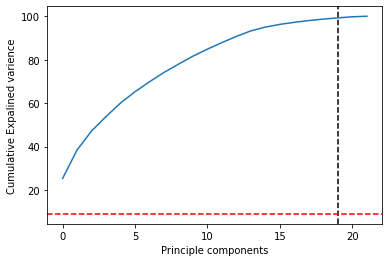

In [69]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here the plot x axis contains principan components and y axis conatins cumulative expalined varience

# Modle Handling

In [70]:
x_train=df.drop('Next_Tmax',axis=1)
y_train=df.Next_Tmax

In [71]:
x_train=df.drop('Next_Tmin',axis=1)
y_train=df.Next_Tmin

In [72]:
x_train.head()

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [73]:
y_train.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [74]:
x_train.shape

(7588, 21)

x_train contains 7588 rows and 21 columns

In [75]:
y_train.shape

(7588,)

y_train contains 7588 rows and zero columns

# Regressor method

In [76]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [77]:
x= df.drop(['Next_Tmax'],axis=1)
y=df["Next_Tmax"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
x= df.drop(['Next_Tmin'],axis=1)
y=df["Next_Tmin"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

1.1459759463292487
1.1532762519478943
1.14795458816775
1.1492822988158922
1.143011647282499
1.1276440163757284
1.1387329713210421
1.1516500163725105
1.1518702212435286
1.1485053585550988
1.1259573587172558
1.1363818180363658
1.1292085677410597
1.1329447911828041
1.1381630022816793
1.1342174726930982
1.1280353576532707
1.149202048877224
1.1437404830161948
1.1509147418827357
1.1336394223565749
1.1411601013055066
1.1481554204746052
1.1394963406735592
1.1227055360534712
1.1339183175997036
1.123312671097744
1.1294768922230662
1.1510893047958022
1.1227554097598138
1.1485168301295845
1.155068454986489
1.1392014631528256
1.1566357785018895
1.138264286665342
1.1429741846711892
1.157247882433394
1.1578966437818012
1.1430952132988164
1.1372017989296366
1.1388284204734256
1.1506542791352348
1.1542440447704336
1.1609335891509782
1.1472772373269406
1.1409580376778832
1.1268316957821323
1.1374016339637227
1.1446616658999131
1.1484451309091033
1.145170876893882
1.157142566683593
1.1441695010649975
1.1

In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred = regressor.predict(x_test)
y_pred

array([21.3, 23.9, 27. , ..., 24.4, 24.4, 21.6])

In [82]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegresso is 100

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred = regressor.predict(x_test)
y_pred

array([21.08818947, 23.47321808, 26.34563847, ..., 23.72359775,
       22.43574009, 22.30716807])

In [85]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

83.46

The Test Accuracy of LogisticRegression is 83.46

In [86]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
y_pred = regressor.predict(x_test)
y_pred

array([21.064, 23.213, 26.178, ..., 23.533, 22.943, 21.737])

In [88]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.66

The Test Accuracy of RandomForestRegressor is 98.63

In [89]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [90]:
y_pred = regressor.predict(x_test)
y_pred

array([23.14264995, 23.18857545, 23.15462919, ..., 23.17793032,
       22.98628329, 23.29811013])

In [91]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

14.59

The Test Accuracy of SVR is 14.59

In [92]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)


KNeighborsRegressor()

In [93]:
y_pred = regressor.predict(x_test)
y_pred

array([21.78, 23.  , 24.44, ..., 21.22, 24.16, 21.96])

In [94]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

67.96

The Test Accuracy of KNN is 67.96

# Cross value correction

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6287439036717443


In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7946214685609019


In [98]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.055739699298865505


In [99]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7760465778001323


In [100]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.04278018461460116


# Hyperparameter tunning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [103]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [105]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 7}

# Evaluate The Final Model

In [106]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

78.67047512410339


# Saving The Model

In [107]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here saving the model[FinalModle.pkl]

# Prediction Method

In [108]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[21.6 23.8 27.  19.4 21.5 22.1 24.4 22.4 26.  20.5 17.8 23.3 21.2 24.4
 24.  23.3 24.7 26.8 24.9 21.7 22.4 27.  20.6 25.3 25.3 25.2 25.7 21.4
 23.2 23.  24.2 21.3 22.4 24.9 26.6 23.6]
[21.5 23.2 26.1 20.5 23.2 23.2 22.5 23.3 25.6 21.3 17.9 23.4 22.  24.3
 26.  21.3 25.1 25.2 23.7 22.5 23.5 27.2 21.5 24.9 25.4 27.5 26.  21.8
 22.5 21.  23.6 21.4 22.5 24.5 27.2 20.8]


The train and test data is balanced most classification methods hit the 79% accuracy with the datset.